## MUHAMMAD RIZQI NURROHMAT #
## 0110224001 #

# Import Library & load Dataset

Pada tahap ini, dilakukan pengimporan library yang dibutuhkan untuk analisis data dan pemodelan machine learning, seperti pandas untuk manipulasi data, numpy untuk operasi numerik, serta matplotlib dan seaborn untuk visualisasi data. Setelah itu, dataset dimuat dari file eksternal ke dalam program menggunakan pandas, sehingga data dapat diolah dan dianalisis lebih lanjut. Menampilkan beberapa baris awal dataset bertujuan untuk memastikan data telah berhasil dimuat dengan benar dan memberikan gambaran awal mengenai struktur dan isi data tersebut.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

df = pd.read_csv('../data/apples_and_oranges.csv')
df.head()

,Weight,Size,Class
0,69,4.39,orange
1,69,4.21,orange
2,65,4.09,orange
3,72,5.85,apple
4,67,4.70,orange


# Eksplorasi Data

Pada tahap ini, dilakukan pengecekan informasi dasar dari dataset menggunakan fungsi info() yang menampilkan ringkasan seperti jumlah data, tipe data setiap kolom, dan jumlah nilai yang tidak kosong. Selanjutnya, fungsi describe() digunakan untuk melihat statistik deskriptif dari dataset, seperti nilai rata-rata, standar deviasi, nilai minimum, maksimum, dan kuartil, yang membantu memahami distribusi dan karakteristik data secara umum.

In [4]:
# mengecek informasi dataset
df.info()

# mengecek statistik deskriptif dataset
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Weight  40 non-null     int64  
 1   Size    40 non-null     float64
 2   Class   40 non-null     object 
dtypes: float64(1), int64(1), object(1)
memory usage: 1.1+ KB


,Weight,Size
count,40.000000,40.000000
mean,70.200000,4.922750
std,3.039906,0.590063
min,65.000000,4.010000
25%,68.000000,4.360000
50%,70.000000,4.930000
75%,73.000000,5.472500
max,75.000000,5.850000


In [5]:
# mengecek missing values
df.isnull().sum()

Weight    0
Size      0
Class     0
dtype: int64

# Preprocessing Data

Pada tahap ini, dilakukan pengecekan tipe data pada kolom 'Class'. Jika tipe data kolom tersebut adalah objek (biasanya berupa teks atau kategori), maka dilakukan proses encoding dengan mengubah nilai kategori menjadi nilai numerik. Dalam contoh ini, kategori 'apple' diubah menjadi 0 dan 'orange' menjadi 1. Proses ini penting agar data kategori dapat digunakan dalam algoritma machine learning yang umumnya memerlukan input numerik. Setelah encoding, ditampilkan beberapa baris awal dataset untuk memastikan perubahan sudah diterapkan dengan benar.

In [6]:
# Jika kolom 'Class' bertipe object, lakukan encoding
if df['Class'].dtype == 'object':
    df['Class'] = df['Class'].map({'apple': 0, 'orange': 1})
df.head()

,Weight,Size,Class
0,69,4.39,1
1,69,4.21,1
2,65,4.09,1
3,72,5.85,0
4,67,4.70,1


# Pemisahan Fitur & Target

Pada tahap ini, dataset dipisahkan menjadi dua bagian utama, yaitu fitur dan target. Variabel x berisi fitur-fitur yang digunakan untuk memprediksi, dalam hal ini kolom 'Weight' dan 'Size'. Sedangkan variabel y berisi target atau label yang ingin diprediksi, yaitu kolom 'Class'. Pemisahan ini penting agar model machine learning dapat belajar dari fitur untuk memprediksi target dengan benar.

In [7]:
x = df[['Weight', 'Size']]
y = df[['Class']]

# Split Data Training & Testing

Pada tahap ini, dataset dibagi menjadi data pelatihan (training) dan data pengujian (testing) menggunakan fungsi train_test_split. Proporsi data pengujian ditetapkan sebesar 20% dari keseluruhan data, sedangkan 80% sisanya digunakan untuk pelatihan model. Parameter random_state=42 digunakan agar pembagian data ini dapat direproduksi dengan hasil yang sama setiap kali dijalankan. Pembagian ini penting untuk mengevaluasi performa model secara objektif pada data yang belum pernah dilihat sebelumnya.

In [8]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Training Algoritma Klasifikasi

Pada tahap ini, dilakukan pembuatan dan pelatihan model klasifikasi menggunakan algoritma Decision Tree. Model diinisialisasi dengan DecisionTreeClassifier() kemudian dilatih menggunakan data pelatihan (X_train dan y_train). Setelah model selesai dilatih, dilakukan prediksi terhadap data pengujian (X_test). Hasil prediksi tersebut kemudian dievaluasi dengan menghitung akurasi menggunakan accuracy_score dan menampilkan laporan klasifikasi (classification_report) yang berisi metrik seperti precision, recall, dan f1-score. Evaluasi ini penting untuk menilai performa model dalam mengklasifikasikan data baru.

In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

model = DecisionTreeClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Akurasi:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred) )

Akurasi: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         5

    accuracy                           1.00         8
   macro avg       1.00      1.00      1.00         8
weighted avg       1.00      1.00      1.00         8



# Visualisasi

confusion matrix untuk mengevaluasi performa model klasifikasi dengan membandingkan hasil prediksi (y_pred) dan data aktual (y_test). Confusion matrix divisualisasikan menggunakan heatmap dengan bantuan library seaborn, yang menampilkan jumlah prediksi benar dan salah untuk masing-masing kelas ('Apple' dan 'Orange'). Label sumbu x menunjukkan kelas hasil prediksi, sedangkan label sumbu y menunjukkan kelas sebenarnya. Visualisasi ini memudahkan dalam memahami seberapa baik model dalam mengklasifikasikan setiap kelas dan mengidentifikasi jenis kesalahan yang terjadi.

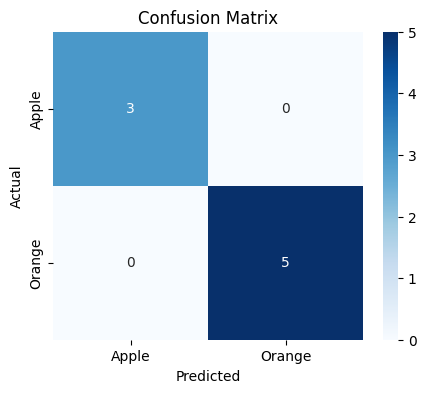

In [10]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Apple','Orange'], yticklabels=['Apple','Orange'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

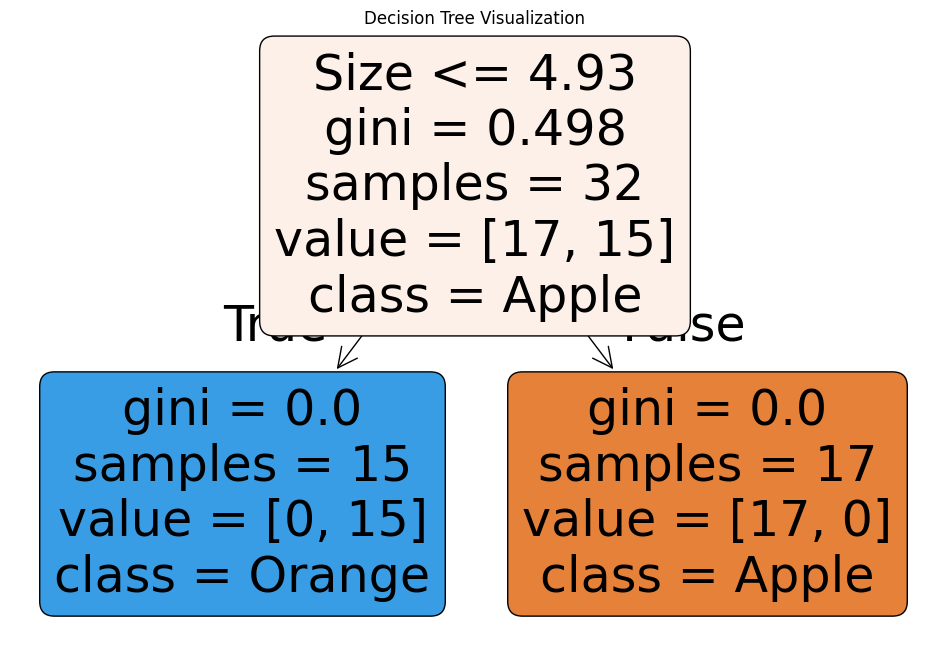

In [11]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
plot_tree(model, filled=True, feature_names=['Weight', 'Size'], class_names=['Apple', 'Orange'], rounded=True)
plt.title('Decision Tree Visualization')
plt.show()

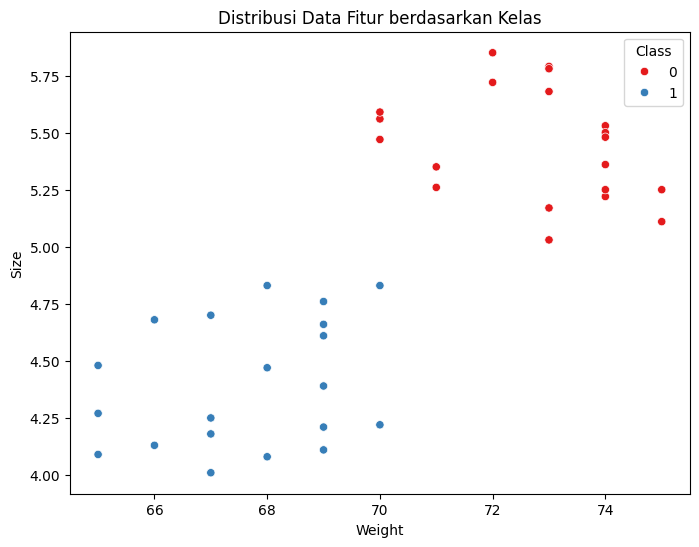

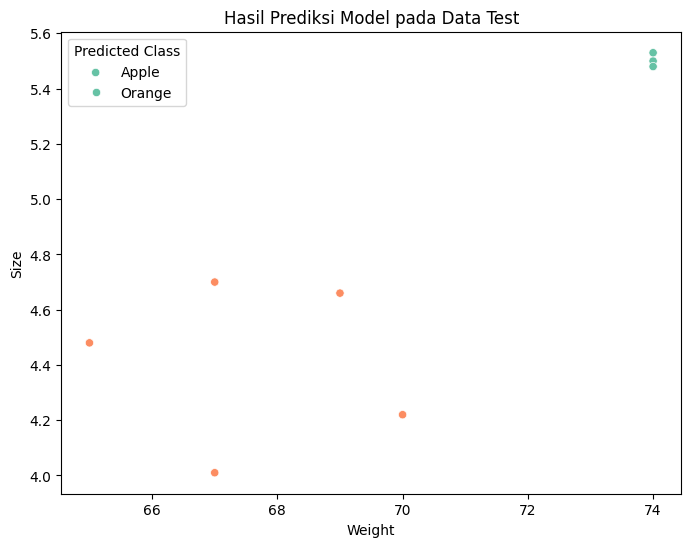

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualisasi distribusi data fitur 'Weight' dan 'Size' berdasarkan kelas sebenarnya
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='Weight', y='Size', hue='Class', palette='Set1')
plt.title('Distribusi Data Fitur berdasarkan Kelas')
plt.xlabel('Weight')
plt.ylabel('Size')
plt.show()

# Visualisasi hasil prediksi model pada data test
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_test['Weight'], y=X_test['Size'], hue=y_pred.flatten(), palette='Set2')
plt.title('Hasil Prediksi Model pada Data Test')
plt.xlabel('Weight')
plt.ylabel('Size')
plt.legend(title='Predicted Class', labels=['Apple', 'Orange'])
plt.show()